In [39]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [12]:
Customer = pd.read_csv("D:\credit card case study python\Customer Acqusition.csv")
Customer.pop('No')
Customer

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [13]:
Repayment = pd.read_csv("D:\credit card case study python\Repayment.csv")
Repayment.pop('SL No:')
Repayment.pop('Unnamed: 4')
Repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [14]:
spend = pd.read_csv("D:\credit card case study python\spend.csv")

In [15]:
spend.pop('Sl No:')
spend

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1495,A67,4-Feb-06,BUS TICKET,356872.73
1496,A68,25-Mar-06,BUS TICKET,204971.10
1497,A69,31-Mar-06,BUS TICKET,50449.44
1498,A70,23-Mar-06,BUS TICKET,80593.94


# 1. In the above dataset,
 #a. In case age is less than 18, replace it with mean of age values

In [16]:
Cust = pd.DataFrame(Customer)
Cust.loc[Cust['Age']<18,'Age'] = Cust.Age.mean()
Cust

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [17]:
#b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [18]:
Customer_spend = pd.merge(left = Customer,right = spend ,on = 'Customer', how = 'inner')
Customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [19]:
Customer_spend.loc[Customer_spend.Amount > Customer_spend.Limit, 'Amount'] = Customer_spend.Limit/2
Customer_spend.Amount

0       485470.80
1       410556.13
2        23740.46
3       484342.47
4       369694.07
          ...    
1495     54729.66
1496      5000.00
1497      5000.50
1498      5001.00
1499     50000.00
Name: Amount, Length: 1500, dtype: float64

In [20]:
Customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


In [21]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [22]:
Customer_Repayment = pd.merge(left = Customer,right = Repayment,on = 'Customer',how = 'inner')
Customer_Repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [23]:
Customer_Repayment.loc[Customer_Repayment.Amount > Customer_Repayment.Limit, 'Amount'] = Customer_Repayment.Limit
Customer_Repayment.Amount

0       495414.75
1       245899.02
2       259490.06
3       437555.12
4       165972.88
          ...    
1495    100000.00
1496     10000.00
1497     10001.00
1498     10002.00
1499     69551.19
Name: Amount, Length: 1500, dtype: float64

In [24]:
Customer_Repayment

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


# 2. From the above dataset create the following summaries:
 a. How many distinct customers exist?

In [25]:
Customer.Customer.nunique()

100

b. How many distinct categories exist?

In [26]:
product = Customer_spend.Product.nunique()
segment = Customer_spend.Segment.nunique()
typ = Customer_spend.Type.nunique()
print('Product =',product)
print('Segment =',segment)
print('Type =', typ)


Product = 3
Segment = 5
Type = 15


c. What is the average monthly spend by customers?

In [27]:
Customer_spend.groupby(pd.DatetimeIndex(Customer_spend['Month']).month)['Amount'].mean().reset_index()

,Month,Amount
0,1,147770.183266
1,2,151261.565126
2,3,131840.761861
3,4,135035.927333
4,5,151623.982190
5,6,182037.731429
6,7,166326.817857
7,8,165759.596190
8,9,141131.704524
9,10,131017.854286


d. What is the average monthly repayment by customers?

In [28]:
Customer_Repayment.groupby(pd.DatetimeIndex(Customer_Repayment['Month']).month)['Amount'].mean().reset_index()

,Month,Amount
0,1,163445.534263
1,2,158873.098158
2,3,156430.854155
3,4,167676.814933
4,5,186097.903985
5,6,114146.549375
6,7,165203.918980
7,8,152817.425510
8,9,129345.768500
9,10,170118.928750


e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [76]:
s = Customer_spend.groupby(pd.DatetimeIndex(Customer_spend['Month']).month)['Amount'].sum().reset_index()
r = Customer_Repayment.groupby(pd.DatetimeIndex(Customer_Repayment['Month']).month)['Amount'].sum().reset_index()
profit = pd.DataFrame({'Month Number':[1,2,3,4,5,6,7,8,9,10,11,12],'Amount': (s.Amount - r.Amount),'Profit':(np.where((s.Amount - r.Amount)>0,((s.Amount - r.Amount)*2.9/100).round(2),'0'))})
profit

,Month Number,Amount,Profit
0,1,-3.202633e+08,0
1,2,NaN,0
2,3,NaN,0
3,4,NaN,0
4,5,NaN,0
5,6,NaN,0
6,7,NaN,0
7,8,NaN,0
8,9,NaN,0
9,10,NaN,0


f. What are the top 5 product types?

In [29]:
spend.Type.value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

 g. Which city is having maximum spend?

In [30]:
Customer_spend.groupby('City')['Amount'].sum().nlargest(n=1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

h. Which age group is spending more money?

In [31]:

Customer_spend['Age Group'] = pd.cut(Customer_spend.Age, bins = np.arange(18, 88, 8), labels = ['18-26', '26-34', '34-42', '42-50', '50-58', '58-66', '66-74', '74-82'])
Customer_spend.groupby('Age Group')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(1)

,Amount
Age Group,
42-50,53242390.7


In [32]:
Customer_Repayment.groupby('Customer')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(10).reset_index()

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.

In [41]:
Customer_spend.Month = pd.to_datetime(Customer_spend.Month, format = '%d-%b-%y')
Customer_spend['Yearly'] = Customer_spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))
City_Wise_Spend = Customer_spend.pivot_table(index = ['City', 'Yearly'], columns = 'Product', values = 'Amount', aggfunc = 'sum')
City_Wise_Spend

Product                   Gold    Platimum      Silver
City       Yearly                                     
BANGALORE  2004     9289878.54  1112732.30  1291852.58
           2005    12892362.99   912284.97   830612.34
           2006    12030611.09   685831.27  1415480.94
BOMBAY     2004     6987853.53   897264.94   532089.03
           2005     8983018.28   711804.94   508988.54
           2006     7917144.31   972130.01  1092833.80
CALCUTTA   2004     7477140.98  2037690.30   500006.00
           2005    10303355.80  4434696.31   440147.06
           2006    11167532.77  3589606.66  1157956.42
CHENNAI    2004     1059618.50  3535652.38   282056.86
           2005     3740945.58  5053956.32   377184.49
           2006     2704288.62  5024923.40   350009.50
COCHIN     2004     7315850.15  3419904.07   814229.62
           2005    12110613.03  4960921.71   652269.38
           2006    10499142.38  4920592.29  1269990.87
DELHI      2004     2806495.00   283512.89   768172.30
           2005     1964845.27   494157.86   612311.21
           2006     2957103.32   176788.72   854899.97
PATNA      2004     2072567.90  1113069.60   756684.10
           2005     3252615.77  2883231.07   950094.19
           2006     2276181.69  1256137.65   700005.00
TRIVANDRUM 2004     2415102.84  2161676.67   209667.48
           2005     1240375.85  3601443.30   269912.99
           2006     2735710.87  2147403.75   555862.12

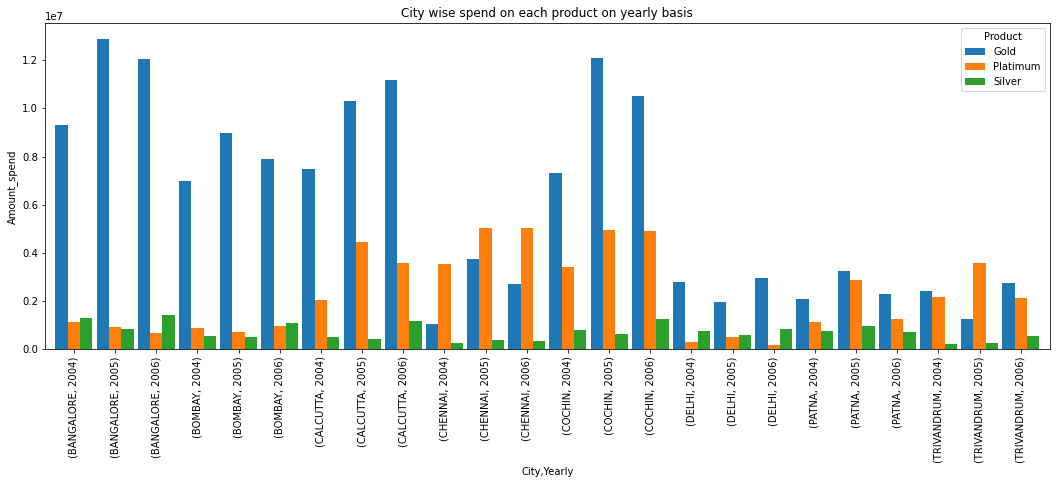

In [42]:
City_Wise_Spend.plot(kind = 'bar', width = 0.9, figsize = (18,6))
plt.title('City wise spend on each product on yearly basis')
plt.ylabel('Amount_spend')
plt.show()

# 4. Create graphs for
 a. Monthly comparison of total spends, city wise

In [43]:
Customer_spend['Monthly'] = Customer_spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
City_Wise_Monthly_Spend = Customer_spend.pivot_table(index = 'City', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
City_Wise_Monthly_Spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


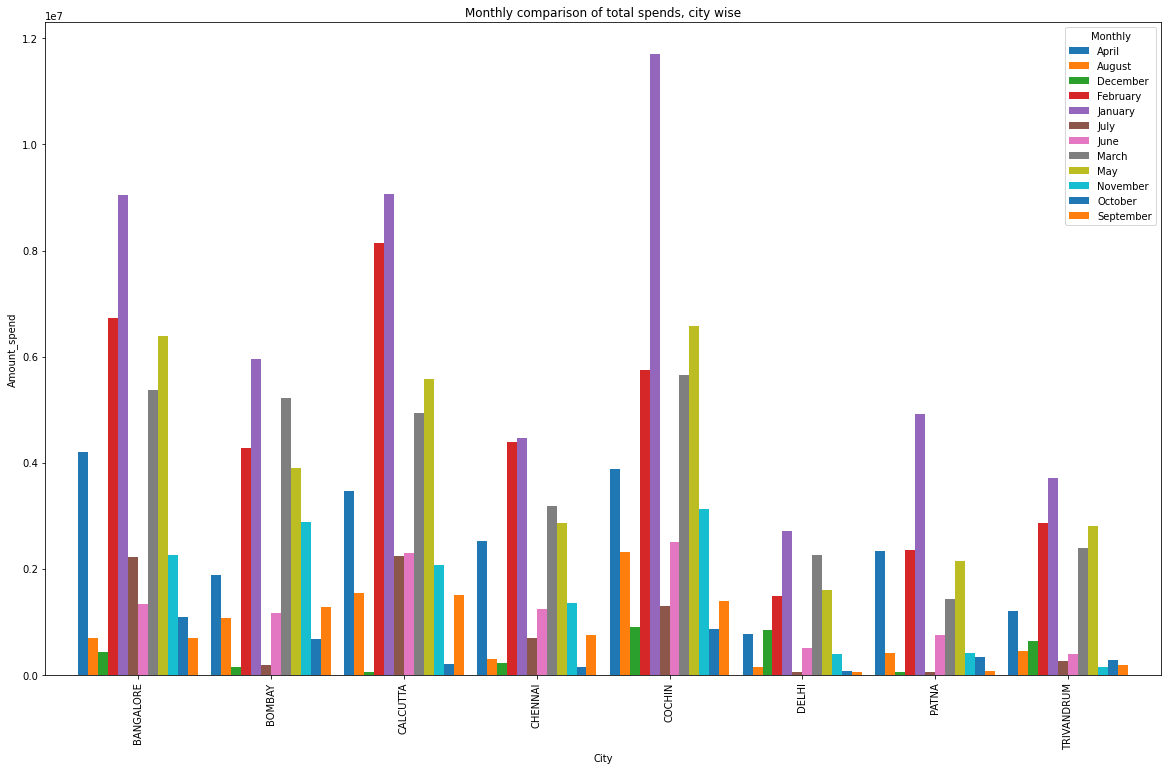

In [48]:
City_Wise_Monthly_Spend.plot(kind = 'bar', width = 0.9, figsize = (20,12))
plt.title('Monthly comparison of total spends, city wise')
plt.ylabel('Amount_spend')
plt.show()

In [49]:
# b.. Comparison of yearly spend on air tickets

In [50]:
Yearly_Spend_On_Air_Tickets = Customer_spend.loc[Customer_spend.Type == 'AIR TICKET', ['Yearly', 'Amount']].groupby('Yearly').sum()
Yearly_Spend_On_Air_Tickets

,Amount
Yearly,
2004,4357225.35
2005,10550152.21
2006,5248469.56


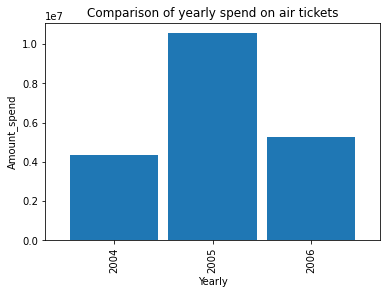

In [51]:
Yearly_Spend_On_Air_Tickets.plot(kind ='bar', width = 0.9, legend = None)
plt.title('Comparison of yearly spend on air tickets')
plt.ylabel('Amount_spend')
plt.show()

In [52]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [53]:
Product_Wise_Monthly_Spend = Customer_spend.pivot_table(index = 'Product', columns = 'Monthly', values = 'Amount', aggfunc = 'sum')
Product_Wise_Monthly_Spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


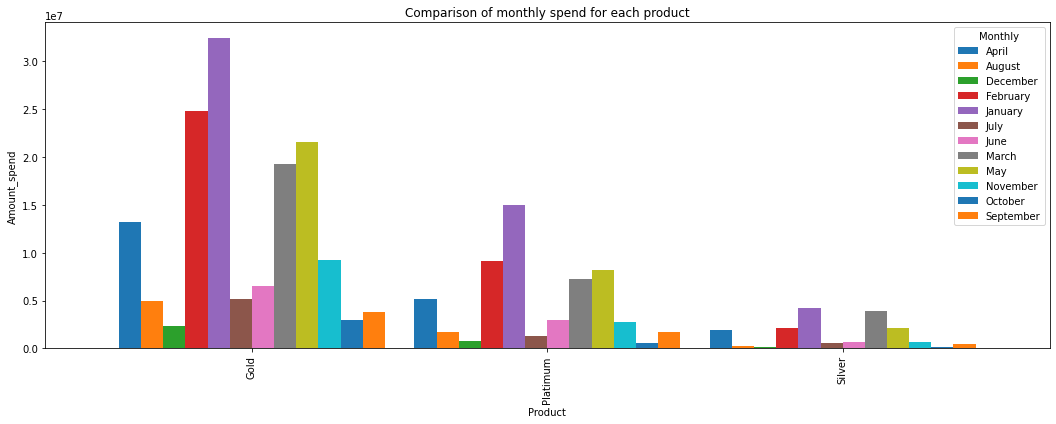

* We can see from the above graph that out of all months, highest sales are in January for all the Products


In [54]:
Product_Wise_Monthly_Spend.plot(kind = 'bar', width = 0.9, figsize = (18,6))
plt.title('Comparison of monthly spend for each product')
plt.ylabel('Amount_spend')
plt.show()
print('* We can see from the above graph that out of all months, highest sales are in January for all the Products')

# 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [74]:
Customer_Repayment = pd.merge(left=Customer,right=Repayment,on="Customer",how="inner")
Customer_Repayment['Month'] = pd.DatetimeIndex(Customer_Repayment['Month']).month
Customer_Repayment['Year'] = pd.DatetimeIndex(Customer_Repayment['Month']).year
def top10Customers(product_category,time_period):    
    return customer_repayment.loc[(Customer_Repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().nlargest(n=10).reset_index().sort_values('Amount',ascending=False)

product_category=str(input("Please Enter Product Category (Gold/Silver/Platinum): "))
time_period=str(input("Please Enter Time Period (Year/Month): "))
Customers=top10Customers(product_category,time_period)
Customers

Please Enter Product Category (Gold/Silver/Platinum): Gold
Please Enter Time Period (Year/Month): Year


,Customer,City,Product,Year,Amount
0,A61,COCHIN,Gold,2005,4276860.55
1,A44,DELHI,Gold,2005,4165317.77
2,A45,COCHIN,Gold,2005,4042447.57
3,A43,BANGALORE,Gold,2005,4006956.60
4,A13,BANGALORE,Gold,2005,3757673.00
5,A61,COCHIN,Gold,2006,3744127.41
6,A60,CALCUTTA,Gold,2005,3742856.10
7,A13,BANGALORE,Gold,2006,3477314.89
8,A29,CALCUTTA,Gold,2006,3434298.00
9,A28,TRIVANDRUM,Gold,2006,3376614.65
